### Analiza apl. monolitycznej

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./irius_threats_monolith.csv")

df.head()
print(df["Threat"].to_list())

['An attacker can inspect the HTTP responses using a proxy to access to sensitive information that is not directly visible in the client application', 'An attacker exploits a weakness in the configuration of access controls and is able to bypass the intended protection that these measures guard against and thereby obtain unauthorized access to the application', 'Attackers gain access to the system and are not detected', 'Attackers gain unauthorized access to data and/or systems through Injection attacks', 'Excessive Allocation', 'Attackers gain unauthorised access to data and/or systems through SQL Injection attacks', 'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service', 'Authentication Bypass', 'Data leakage or disclosure to unauthorized parties', 'Attackers who compromise the application or application server could directly access and modify the data store', 'An adversary embeds malicious scripts in content that will be served to web browsers', 'A

In [3]:
threats_gpt = [
    'Brute Force Enumeration',
    'Authentication Bypass',
    'Insufficient Logging',
    'Code Injection',
    'Excessive Allocation',
    'SQL Injection',
    'Cross-Site Scripting',
    'Unidentified security vulnerabilities',
    'Third-Party Access',
    'Client-Side Secret',
    'Deprecated Technology',
    'Cross-Site Scripting',
    'Man-in-the-Middle Attack',
    'Privilege Abuse',
    'Clickjacking',
    'Insufficient Logging',
    'Man-in-the-Middle Attack',
    'Brute Force Enumeration',
    'Unidentified security vulnerabilities',
    'Behavior Modification',
    'Unnecessary Privileges',
    'Improper ACL Configuration',
    'WebView Data Access',
    'Error Handling Flaw',
    'Access via buffer overflow',
    'Cross-Site Scripting',
    'Unidentified security vulnerabilities',
    'Third-Party Access',
    'Client-Side Secret',
    'Deprecated Technology',
    'Cross-Site Scripting',
    'Man-in-the-Middle Attack',
    'Privilege Abuse',
    'Clickjacking',
    'Unauthorized Data Access',
    'Authentication Bypass',
    'Data Leakage',
    'Unauthorized Data Access',
    'Cross-Site Scripting',
    'Unidentified security vulnerabilities',
    'Client-Side Secret',
    'Deprecated Technology',
    'Man-in-the-Middle Attack'
]

threat_mapping = dict(zip(df["Threat"].unique(), threats_gpt))
df['Threat abbv'] = threats_gpt


#print(df['Threat abbv'].unique())

threats_to_stride = {
    'An attacker can inspect the HTTP responses using a proxy to access to sensitive information that is not directly visible in the client application' : "Information Disclosure",
    'An attacker exploits a weakness in the configuration of access controls and is able to bypass the intended protection that these measures guard against and thereby obtain unauthorized access to the application':"Elevation of Privilege",
    'Attackers gain access to the system and are not detected':"Elevation of Privilege",
    'Attackers gain unauthorized access to data and/or systems through Injection attacks':"Elevation of Privilege",
    'Excessive Allocation':"Denial of Service",
    'Attackers gain unauthorised access to data and/or systems through SQL Injection attacks':"Elevation of Privilege",
    'An adversary embeds malicious scripts in content that will be served to web browsers':"Information Disclosure",
    'Application contains security vulnerabilities not identified during the development process': "Tampering",
    'Attackers gain unauthorised access to data by compromising third party web resources':"Information Disclosure",
    'Attackers gain unauthorised access to data or services by accessing a client side secret':"Information Disclosure",
    'Attackers gain unauthorised access to the application by the use of deprecated client-side technologies':"Elevation of Privilege",
    'An adversary embeds malicious scripts in content that will be served to web browsers':"Information Disclosure",
    'Attackers could gain access to sensitive data through a man in the middle attack':"Information Disclosure",
    'Privilege Abuse':"Elevation of Privilege",
    'Attackers cause users to peform arbitrary clicks on the site through ClickJacking attacks':"Elevation of Privilege",
    'Attackers gain access to the system and are not detected':"Elevation of Privilege",
    'Attackers gain control of the connection through a Man In The Middle attack':"Information Disclosure",
    'An attacker attempts to invoke all common switches and options to discover weaknesses':"Tampering",
    'Application contains security vulnerabilities not identified during the development process':"Tampering",
    "Attacker gains access to sensitive data by modifying the application's expected behavior": "Information Disclosure",
    'Users lose trust in the application because it requests unnecessary privileges': "Repudiation",
    'Accessing Functionality Not Properly Constrained by ACLs':"Elevation of Privilege",
    'Attackers gain access to the data through the WebView functionality':"Information Disclosure",
    'Attackers gain unauthorised access to the application through an error handling flaw': "Tampering",
    'Attackers gain unauthorised access to the application through buffer overflow flaws': "Elevation of Privilege",
    'An adversary embeds malicious scripts in content that will be served to web browsers': "Information Disclosure",
    'Application contains security vulnerabilities not identified during the development process':"Tampering",
    'Attackers gain unauthorised access to data by compromising third party web resources':"Information Disclosure",
    'Attackers gain unauthorised access to data or services by accessing a client side secret':"Information Disclosure",
    'Attackers gain unauthorised access to the application by the use of deprecated client-side technologies':"Elevation of Privilege",
    'An adversary embeds malicious scripts in content that will be served to web browsers':"Information Disclosure",
    'Attackers could gain access to sensitive data through a man in the middle attack':"Information Disclosure",
    'Privilege Abuse':"Elevation of Privilege",
    'Attackers cause users to peform arbitrary clicks on the site through ClickJacking attacks':"Elevation of Privilege",
    'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service':"Information Disclosure",
    'Authentication Bypass':"Elevation of Privilege",
    'Data leakage or disclosure to unauthorized parties':"Information Disclosure",
    'Attackers who compromise the application or application server could directly access and modify the data store':"Tampering",
    'An adversary embeds malicious scripts in content that will be served to web browsers':"Information Disclosure",
    'Application contains security vulnerabilities not identified during the development process':"Tampering ",
    'Attackers gain unauthorised access to data or services by accessing a client side secret':"Information Disclosure",
    'Attackers gain unauthorised access to the application by the use of deprecated client-side technologies':"Elevation of Privilege",
    'Attackers could gain access to sensitive data through a man in the middle attack':"Information Disclosure"
}


df['STRIDE Category'] = df['Threat'].map(threats_to_stride)

df.head()

,Component,Use Case,Source,Threat,Risk response,Inherent Risk,Current Risk,Countermeasure Progress,Weakness Tests,Countermeasure Tests,Projected Risk,Owner,Threat abbv,STRIDE Category
0,API,General,Created by rules engine,An attacker can inspect the HTTP responses usi...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Brute Force Enumeration,Information Disclosure
1,API,General,Created by rules engine,An attacker exploits a weakness in the configu...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Authentication Bypass,Elevation of Privilege
2,API,General,Created by rules engine,Attackers gain access to the system and are no...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,123 123,Insufficient Logging,Elevation of Privilege
3,API,General,Created by rules engine,Attackers gain unauthorized access to data and...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Code Injection,Elevation of Privilege
4,API,General,Created by rules engine,Excessive Allocation,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,123 123,Excessive Allocation,Denial of Service


In [4]:
df_filtered = df[~df['Component'].isin(['Mobile Device Client', 'Web Client'])]
print(len(df_filtered))

df = df_filtered
df.head()

30


,Component,Use Case,Source,Threat,Risk response,Inherent Risk,Current Risk,Countermeasure Progress,Weakness Tests,Countermeasure Tests,Projected Risk,Owner,Threat abbv,STRIDE Category
0,API,General,Created by rules engine,An attacker can inspect the HTTP responses usi...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Brute Force Enumeration,Information Disclosure
1,API,General,Created by rules engine,An attacker exploits a weakness in the configu...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Authentication Bypass,Elevation of Privilege
2,API,General,Created by rules engine,Attackers gain access to the system and are no...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,123 123,Insufficient Logging,Elevation of Privilege
3,API,General,Created by rules engine,Attackers gain unauthorized access to data and...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,123 123,Code Injection,Elevation of Privilege
4,API,General,Created by rules engine,Excessive Allocation,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,123 123,Excessive Allocation,Denial of Service


In [5]:
threats = df["Threat"]
threats_unique = df["Threat"].unique()

components = df["Component"].unique()

critical = df[df["Inherent Risk"] == "Critical"]
high = df[df["Inherent Risk"] == "High"]


# print(components.tolist())
print("Components defined:",len(components))

# print(threats.tolist())
print("Threats found:",len(threats))

print("High risks:",len(high))
print("Critical risks:",len(critical))

Components defined: 5
Threats found: 30
High risks: 18
Critical risks: 12


In [6]:
useful = df[["Component","Use Case","Threat","Threat abbv","Inherent Risk","STRIDE Category"]]
useful.head()

,Component,Use Case,Threat,Threat abbv,Inherent Risk,STRIDE Category
0,API,General,An attacker can inspect the HTTP responses usi...,Brute Force Enumeration,Critical,Information Disclosure
1,API,General,An attacker exploits a weakness in the configu...,Authentication Bypass,Critical,Elevation of Privilege
2,API,General,Attackers gain access to the system and are no...,Insufficient Logging,High,Elevation of Privilege
3,API,General,Attackers gain unauthorized access to data and...,Code Injection,Critical,Elevation of Privilege
4,API,General,Excessive Allocation,Excessive Allocation,High,Denial of Service


# Threats + risk per component

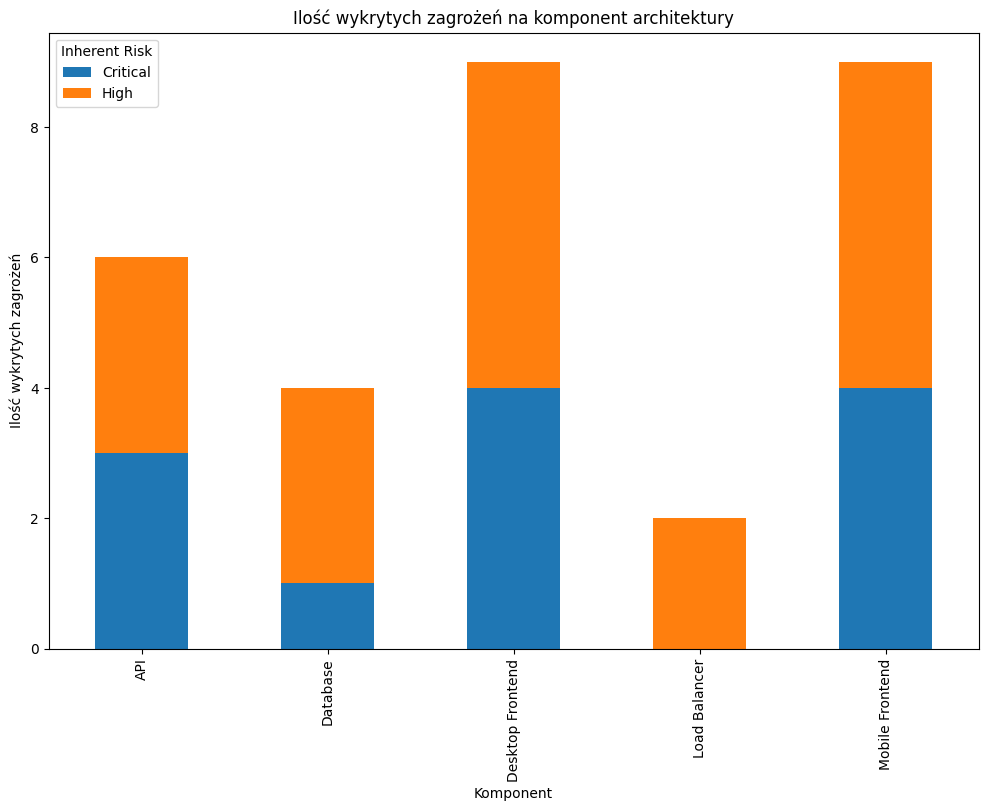

Inherent Risk     Critical  High  Threat Sum
Component                                   
Load Balancer            0     2           2
Database                 1     3           4
API                      3     3           6
Desktop Frontend         4     5           9
Mobile Frontend          4     5           9


In [7]:
grouped_df = df.groupby(['Component', 'Inherent Risk']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ilość wykrytych zagrożeń na komponent architektury')
plt.xlabel('Komponent')
plt.ylabel('Ilość wykrytych zagrożeń')
plt.legend(title='Inherent Risk')
plt.show()

grouped_df["Threat Sum"] = grouped_df["Critical"] + grouped_df["High"]
by_threat_sum = grouped_df.sort_values(by="Threat Sum")
print(by_threat_sum)

# Threats in components

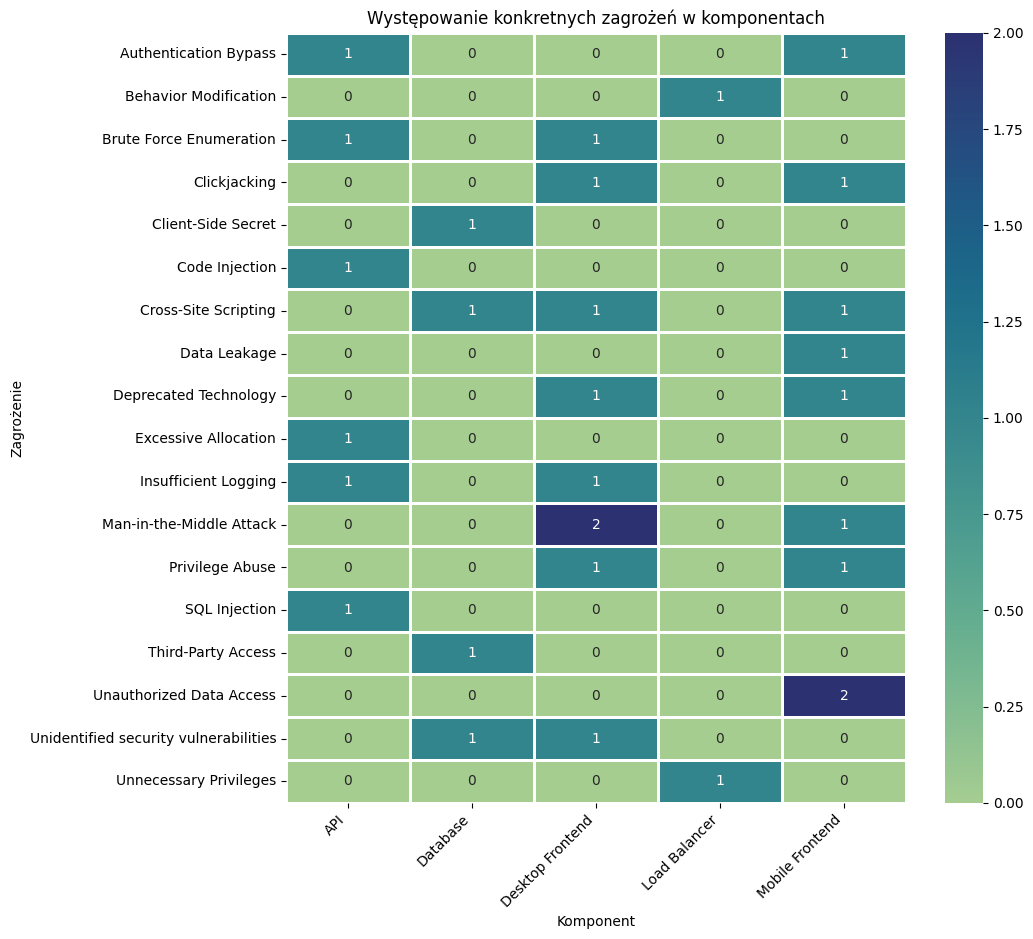

In [8]:

heatmap_data = df.groupby(['Threat abbv','Component']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d",linewidths=1, cmap="crest")
plt.title('Występowanie konkretnych zagrożeń w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

# STRIDE Categories in Components

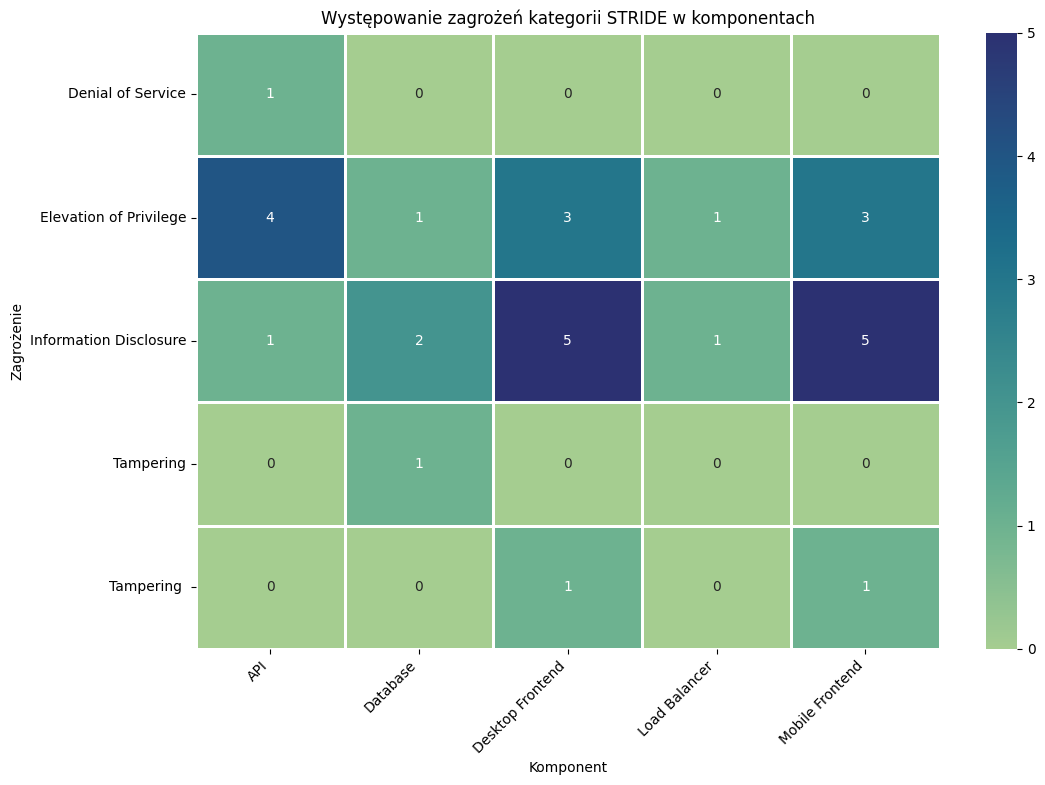

In [13]:
component_category_heatmap = df.groupby(['STRIDE Category','Component']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(component_category_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Występowanie zagrożeń kategorii STRIDE w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

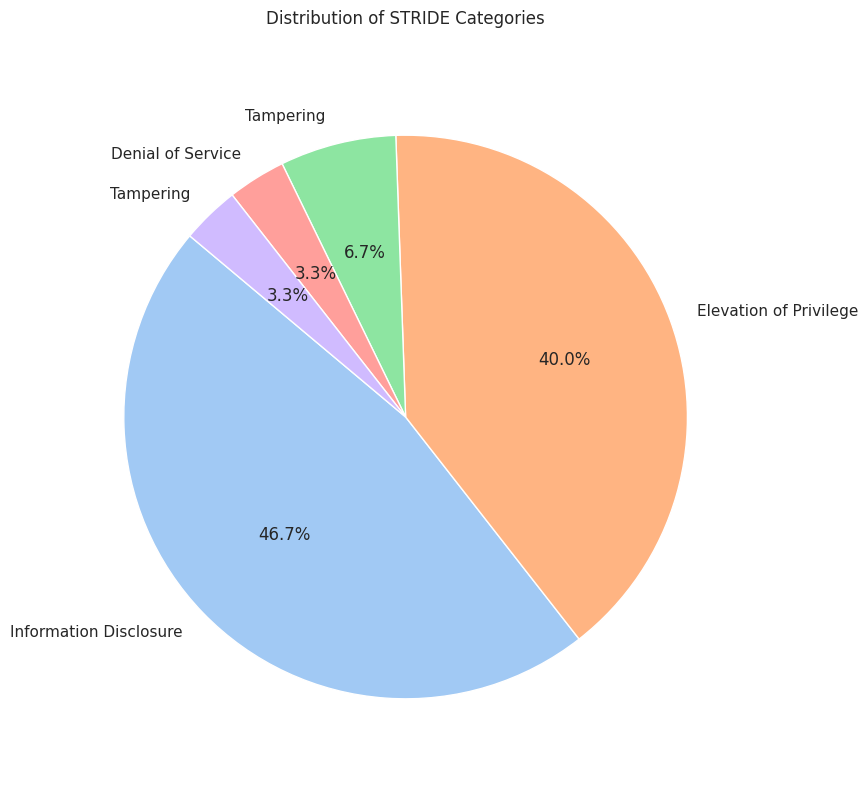

In [14]:
df[['STRIDE Category','Component']]

stride_counts = df['STRIDE Category'].value_counts()

# Set seaborn style
sns.set(style="whitegrid")

# Create the pie chart using matplotlib
plt.figure(figsize=(8, 10))
colors = sns.color_palette('pastel')[0:len(stride_counts)]
plt.pie(stride_counts, labels=stride_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of STRIDE Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

### Obserwacje
